## Importing Libraries

In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tensorflow.keras.utils import plot_model

#### Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

## Data Preprocessing

### Training Image Preprocessing

In [15]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'Plant_Disease_Dataset/Plant_Disease_Dataset/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 70243 files belonging to 38 classes.


### Validation Image Preprocessing

In [16]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'Plant_Disease_Dataset/Plant_Disease_Dataset/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17557 files belonging to 38 classes.


In [17]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [18]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[176.25 168.25 166.25]
   [182.5  174.5  172.5 ]
   [184.25 176.25 174.25]
   ...
   [145.25 134.25 132.25]
   [154.   143.   141.  ]
   [140.75 129.75 127.75]]

  [[180.75 172.75 170.75]
   [179.   171.   169.  ]
   [176.5  168.5  166.5 ]
   ...
   [139.25 128.25 126.25]
   [142.25 131.25 129.25]
   [146.   135.   133.  ]]

  [[181.25 173.25 171.25]
   [179.5  171.5  169.5 ]
   [178.75 170.75 168.75]
   ...
   [148.5  137.5  135.5 ]
   [154.5  143.5  141.5 ]
   [142.75 131.75 129.75]]

  ...

  [[188.25 180.25 178.25]
   [188.   180.   178.  ]
   [188.25 180.25 178.25]
   ...
   [138.   124.   121.  ]
   [140.75 126.75 123.75]
   [140.25 126.25 123.25]]

  [[190.25 182.25 180.25]
   [191.   183.   181.  ]
   [190.5  182.5  180.5 ]
   ...
   [133.25 119.25 116.25]
   [144.   130.   127.  ]
   [138.5  124.5  121.5 ]]

  [[187.5  179.5  177.5 ]
   [189.   181.   179.  ]
   [187.75 179.75 177.75]
   ...
   [137.5  123.5  120.5 ]
   [145.5  131.5  128.5 ]
   [136.   122.   11

### To avoid Overshooting
1. Choose small learning rate default 0.001 we are taking 0.0001
2. There may be chance of Underfitting, so increase number of neuron
3. Add more Convolution layer to extract more feature from images there may be possibilty that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature

## Building Model

In [43]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout,BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Sequential

In [44]:
# Create the model with proper padding and dimensions
model = Sequential([
    # First Convolutional Block
    Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=[128, 128, 3]),
    BatchNormalization(),
    Conv2D(32, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPool2D(pool_size=(2, 2)),
    
    # Second Convolutional Block
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPool2D(pool_size=(2, 2)),
    
    # Third Convolutional Block
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPool2D(pool_size=(2, 2)),
    
    # Fourth Convolutional Block
    Conv2D(256, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(256, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPool2D(pool_size=(2, 2)),
    
    # Flatten and Dense Layers
    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(38, activation='softmax')  # 38 classes
])

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Display model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_17 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 16, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 16, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 16384)          │             

 Total params: 9,709,382 (37.04 MB)

 Trainable params: 9,705,926 (37.03 MB)

 Non-trainable params: 3,456 (13.50 KB)

In [8]:
## Building Convolution Layer

### Compiling Model

In [45]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),  # Remove .legacy
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [46]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_17 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 16, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 16, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 16384)          │             

 Total params: 9,709,382 (37.04 MB)

 Trainable params: 9,705,926 (37.03 MB)

 Non-trainable params: 3,456 (13.50 KB)

### Model Training

In [47]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2196/2196 ━━━━━━━━━━━━━━━━━━━━ 1455s 661ms/step - accuracy: 0.4303 - loss: 2.2353 - val_accuracy: 0.7642 - val_loss: 0.7511
Epoch 2/10
2196/2196 ━━━━━━━━━━━━━━━━━━━━ 3192s 1s/step - accuracy: 0.7843 - loss: 0.7252 - val_accuracy: 0.8501 - val_loss: 0.5055
Epoch 3/10
2196/2196 ━━━━━━━━━━━━━━━━━━━━ 1444s 658ms/step - accuracy: 0.8533 - loss: 0.4860 - val_accuracy: 0.9494 - val_loss: 0.1658
Epoch 4/10
2196/2196 ━━━━━━━━━━━━━━━━━━━━ 1514s 689ms/step - accuracy: 0.9010 - loss: 0.3243 - val_accuracy: 0.9307 - val_loss: 0.2238
Epoch 5/10
2196/2196 ━━━━━━━━━━━━━━━━━━━━ 1618s 737ms/step - accuracy: 0.9278 - loss: 0.2343 - val_accuracy: 0.9439 - val_loss: 0.1712
Epoch 6/10
2196/2196 ━━━━━━━━━━━━━━━━━━━━ 1482s 675ms/step - accuracy: 0.9441 - loss: 0.1748 - val_accuracy: 0.9741 - val_loss: 0.0793
Epoch 7/10
2196/2196 ━━━━━━━━━━━━━━━━━━━━ 1454s 662ms/step - accuracy: 0.9592 - loss: 0.1304 - val_accuracy: 0.9665 - val_loss: 0.1036
Epoch 8/10
2196/2196 ━━━━━━━━━━━━━━━━━━━━ 3112s 1s/step - 

## Model Evaluation

In [48]:
#Model Evaluation on Training set
train_loss,train_acc = model.evaluate(training_set)

2196/2196 ━━━━━━━━━━━━━━━━━━━━ 248s 113ms/step - accuracy: 0.9800 - loss: 0.0592


In [49]:
print(train_loss,train_acc)

0.053307127207517624 0.9825890064239502


In [50]:
#Model on Validation set
val_loss,val_acc = model.evaluate(validation_set)

549/549 ━━━━━━━━━━━━━━━━━━━━ 62s 113ms/step - accuracy: 0.9640 - loss: 0.1178


In [51]:
print(val_loss,val_acc)

0.11920726299285889 0.9629207849502563


### Saving Model

In [52]:
model.save("trained_model.keras")

In [53]:
training_history.history

{'accuracy': [0.5955895781517029,
  0.8200247883796692,
  0.8792762160301208,
  0.913229763507843,
  0.939524233341217,
  0.9511410593986511,
  0.9626154899597168,
  0.9681676626205444,
  0.9740899205207825,
  0.9794570207595825],
 'loss': [1.4694218635559082,
  0.5996080636978149,
  0.3966895341873169,
  0.2840951383113861,
  0.19555824995040894,
  0.1550276279449463,
  0.11938627064228058,
  0.10091473907232285,
  0.08244045078754425,
  0.06541981548070908],
 'val_accuracy': [0.7641966342926025,
  0.8501452207565308,
  0.9493649005889893,
  0.930682897567749,
  0.943897008895874,
  0.9741413593292236,
  0.9665091037750244,
  0.9744831323623657,
  0.9809762239456177,
  0.9629207849502563],
 'val_loss': [0.7511005997657776,
  0.5054849982261658,
  0.16578830778598785,
  0.22377319633960724,
  0.17120490968227386,
  0.07926646620035172,
  0.10362010449171066,
  0.07588333636522293,
  0.0612296387553215,
  0.11920716613531113]}

In [54]:
#Recording History in json
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

In [55]:
training_history.history['val_accuracy']

[0.7641966342926025,
 0.8501452207565308,
 0.9493649005889893,
 0.930682897567749,
 0.943897008895874,
 0.9741413593292236,
 0.9665091037750244,
 0.9744831323623657,
 0.9809762239456177,
 0.9629207849502563]

### Accuracy Visualization

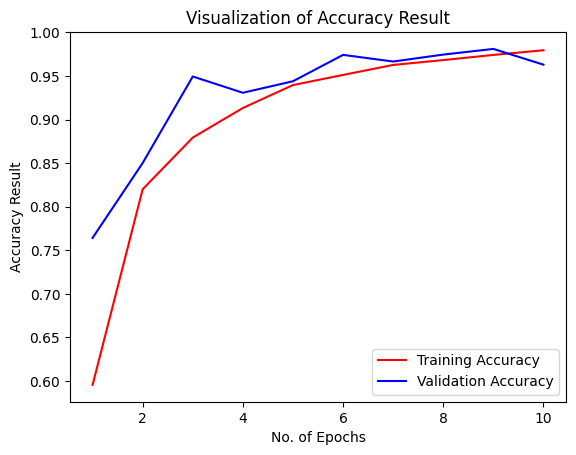

In [56]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

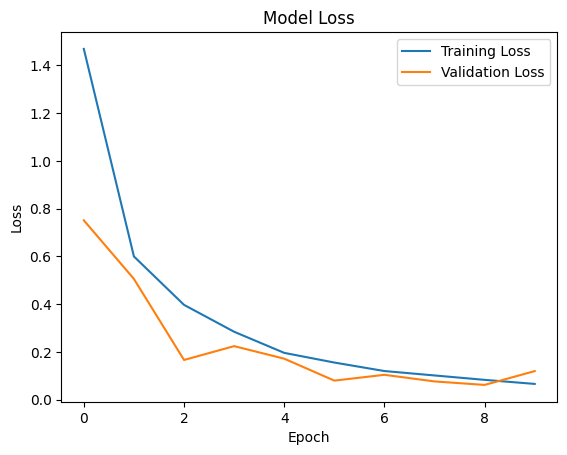

In [57]:
# Same for loss
plt.plot(training_history.history['loss'], label='Training Loss')
plt.plot(training_history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


### Some other metrics for model evaluation

In [58]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [60]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'Plant_Disease_Dataset/Plant_Disease_Dataset/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17557 files belonging to 38 classes.


In [61]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

549/549 ━━━━━━━━━━━━━━━━━━━━ 62s 113ms/step


(array([[9.99999881e-01, 5.69581893e-08, 3.22308291e-10, ...,
         5.76400299e-12, 1.50506926e-10, 3.99489608e-11],
        [9.99992967e-01, 3.74050978e-06, 1.12129015e-07, ...,
         2.64496536e-09, 5.87837690e-08, 5.75261572e-09],
        [1.00000000e+00, 3.18544924e-09, 1.14178181e-10, ...,
         1.04012469e-12, 2.92465940e-10, 1.41228612e-10],
        ...,
        [1.23238864e-09, 6.67488509e-09, 1.85726560e-06, ...,
         7.70640440e-09, 2.06229032e-07, 9.99974370e-01],
        [1.15749643e-09, 1.97194039e-09, 6.30202166e-08, ...,
         1.44959627e-08, 5.75659032e-09, 9.99998927e-01],
        [1.17519416e-08, 2.81056991e-08, 2.12335927e-08, ...,
         3.03677528e-10, 6.24670022e-08, 9.99965072e-01]], dtype=float32),
 (17557, 38))

In [62]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [63]:
predicted_categories

<tf.Tensor: shape=(17557,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [64]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(17557, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [65]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(17557,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

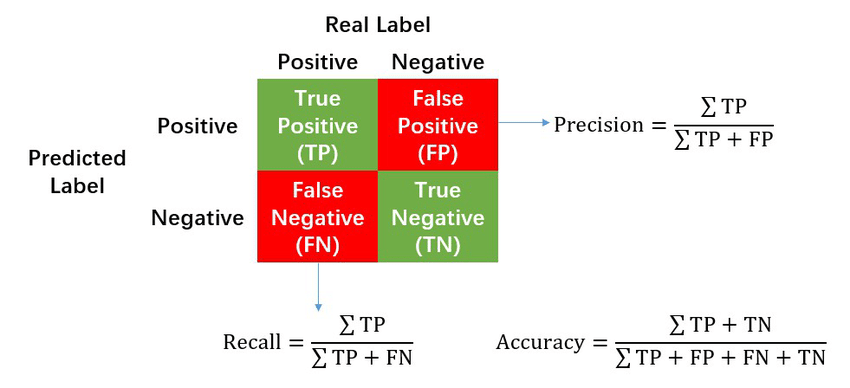

In [66]:
from sklearn.metrics import classification_report,confusion_matrix

In [67]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.96      0.98      0.97       504
                                 Apple___Black_rot       1.00      0.99      0.99       497
                          Apple___Cedar_apple_rust       0.98      0.97      0.97       440
                                   Apple___healthy       0.98      0.99      0.98       502
                               Blueberry___healthy       0.96      0.98      0.97       454
          Cherry_(including_sour)___Powdery_mildew       1.00      1.00      1.00       421
                 Cherry_(including_sour)___healthy       0.98      0.97      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.98      0.86      0.92       395
                       Corn_(maize)___Common_rust_       1.00      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.90      0.99      0.

In [68]:
cm = confusion_matrix(Y_true,predicted_categories)
cm

array([[495,   0,   0, ...,   0,   0,   0],
       [  4, 492,   0, ...,   0,   0,   0],
       [  0,   1, 425, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 471,   0,   0],
       [  0,   0,   0, ...,   0, 448,   0],
       [  0,   0,   0, ...,   0,   0, 476]])

### Confusion Matrix Visualization

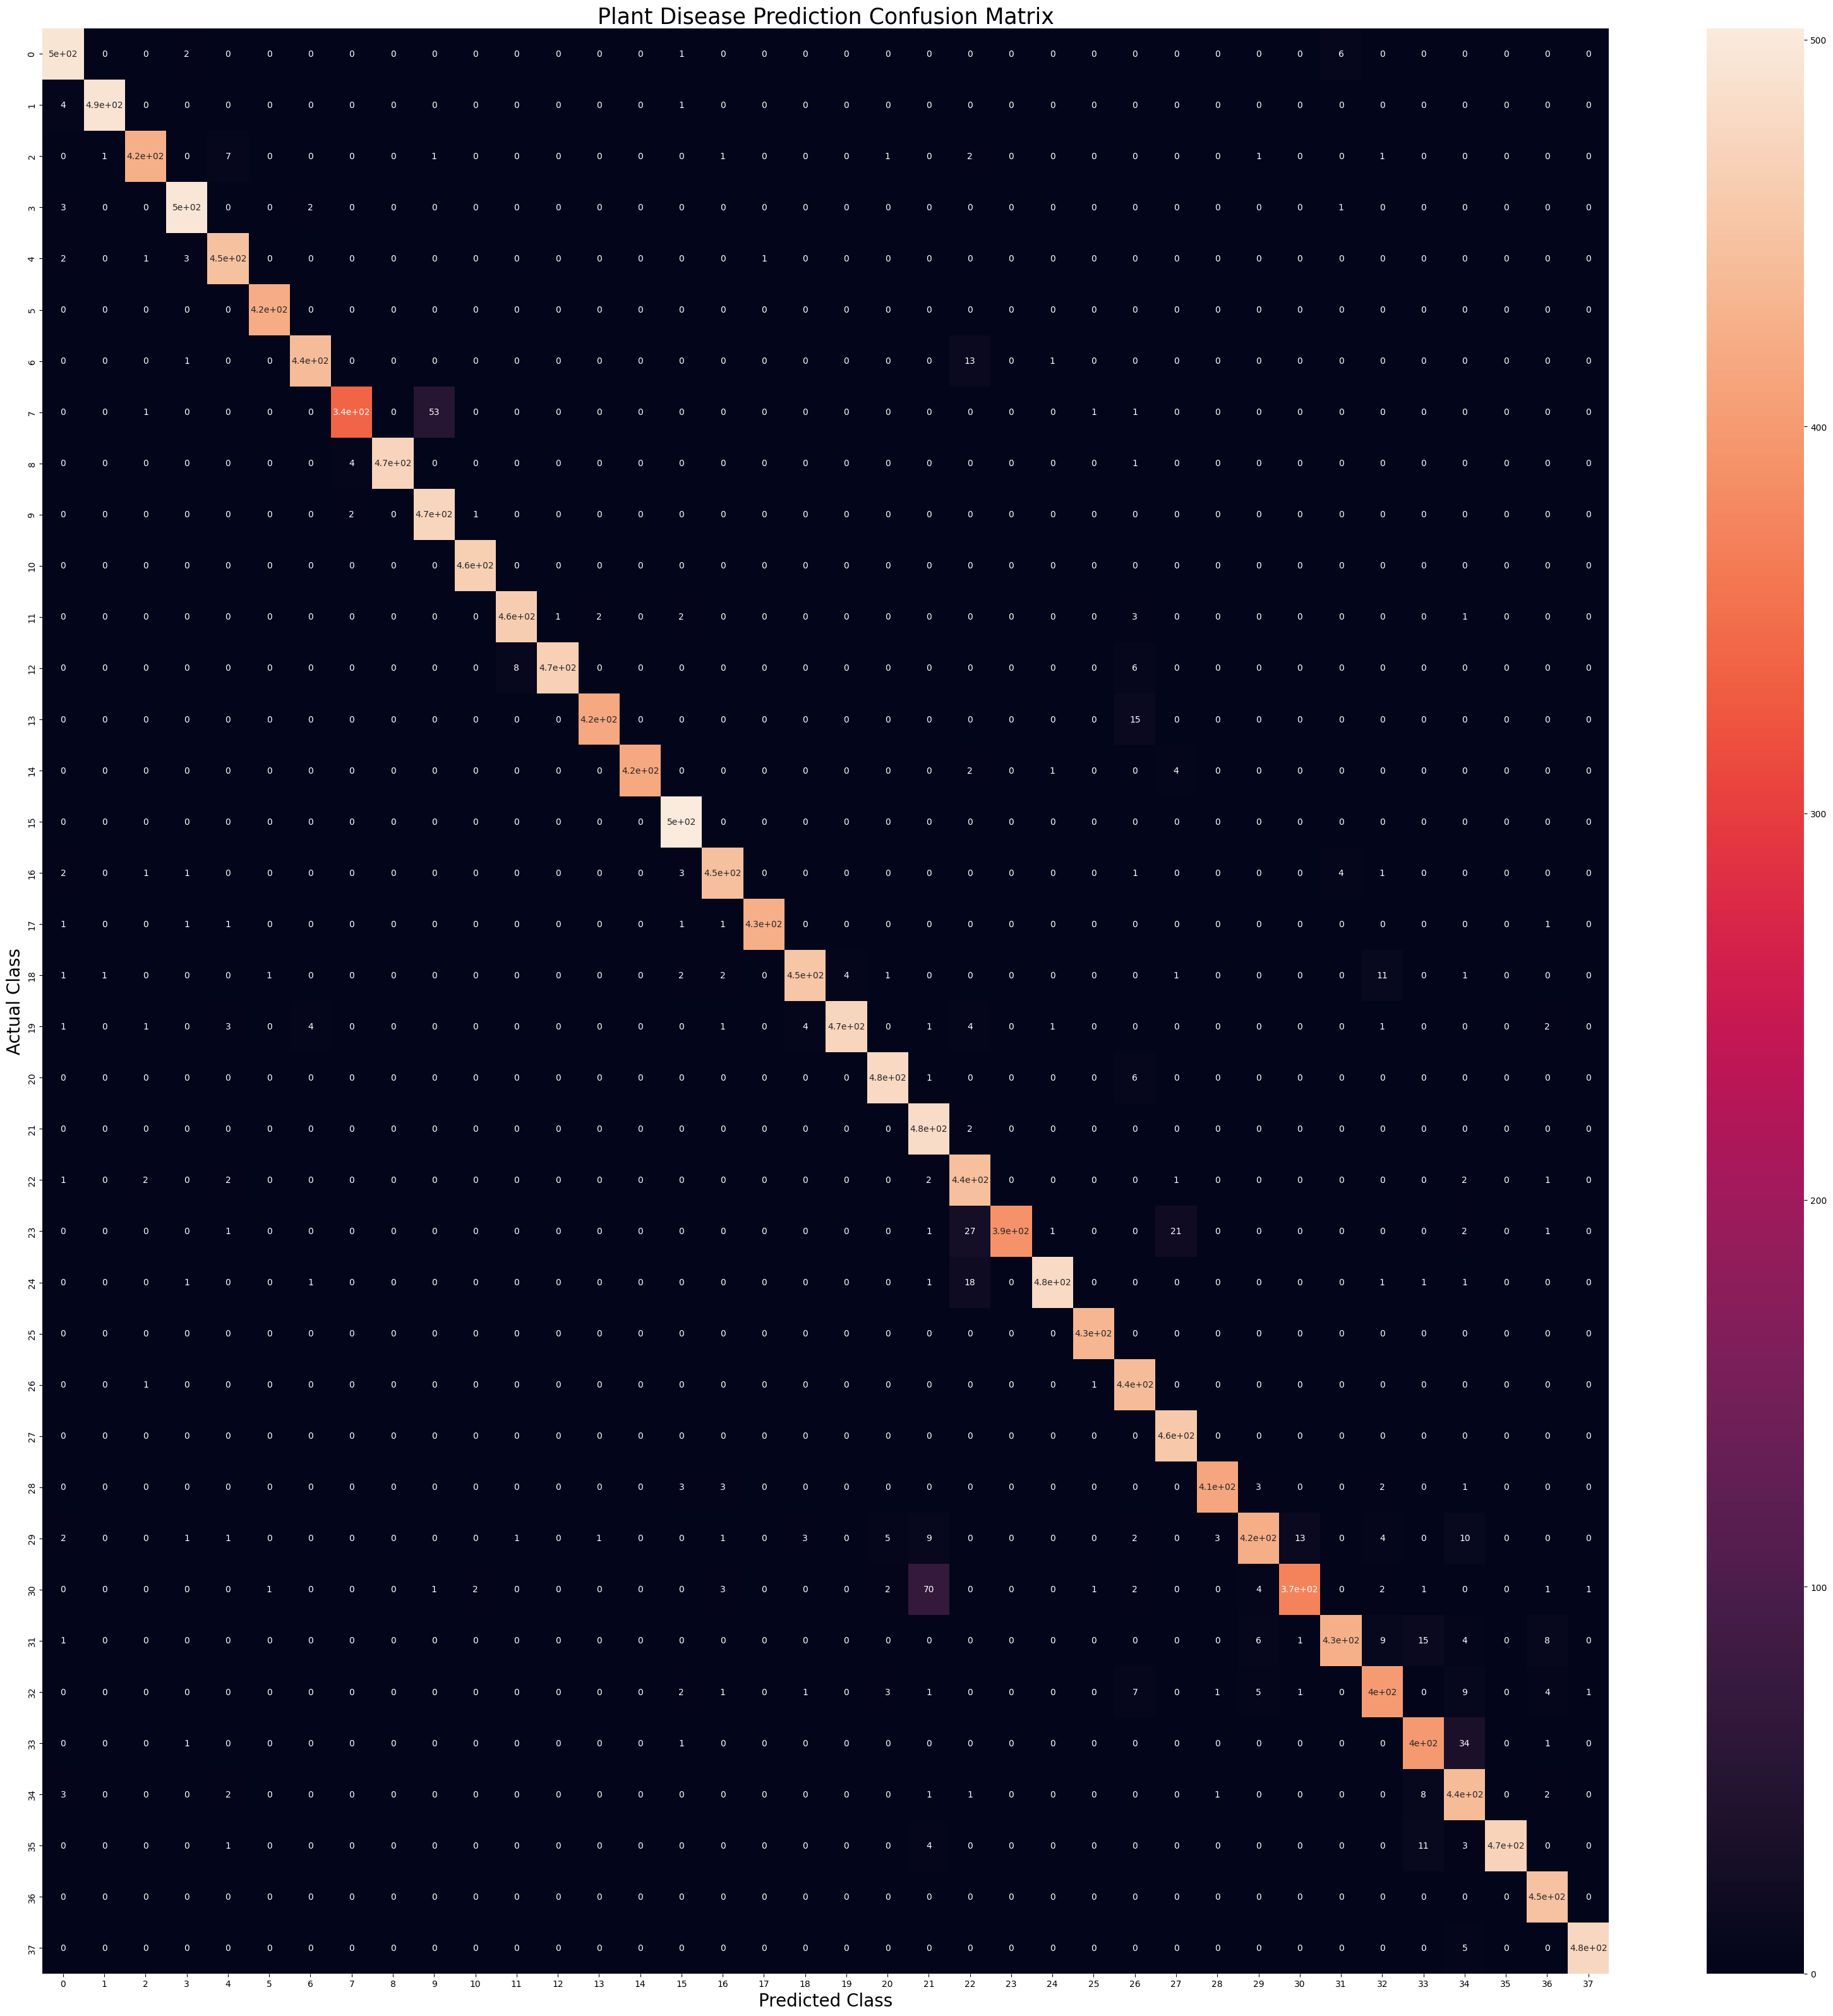

In [69]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Actual Class",fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix",fontsize=25)
plt.show()